# Computer Vision Programming Assignment 2
<hr>

## Name - Abinash Biswal
## UTA ID - 1002175520

<hr>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import math

In [3]:
# My Functions

def read_BGR_image_and_return_RGB_image (location):
    
    bgrImage = cv2.imread(location)
    rgbImage = cv2.cvtColor(bgrImage , cv2.COLOR_BGR2RGB)
    
    return rgbImage




def printImage (image):

    plt.imshow(image , cmap = "gray")
    plt.axis('off')
    plt.show()


# -------------------------------------------------------------------------
def makeImage_2D (img):
    return np.mean(img , axis = 2)

def pad_2d_imageAndReturnNewImage (img) :
    return np.pad(img, pad_width=1, mode='constant', constant_values=0)
# -------------------------------------------------------------------------


def applyDerivativeFunctionToImageAndReturnNewImage (img_3d_noPadding , derivative):

    img_2d_noPadding = makeImage_2D(img_3d_noPadding)
    img_2d_withPadding = pad_2d_imageAndReturnNewImage(img_2d_noPadding)
    
    filter = np.array([])
    
    if derivative == "sobelx":
        filter = np.array([
            [-1, 0, 1],
            [-2, 0, 2],
            [-1 , 0, 1]
        ])
    elif derivative == "sobely":
        filter = np.array([
            [-1, -2, -1],
            [0, 0, 0],
            [1 , 2, 1]
        ])
    elif derivative == "prewittx":
        filter = np.array([
            [-1, 0, 1],
            [-1, 0, 1],
            [-1 , 0, 1]
        ])
    elif derivative == "prewitty":
        filter = np.array([
            [-1, -1, -1],
            [0, 0, 0],
            [1 , 1, 1]
        ])
    elif derivative == "laplacian":
        filter = np.array([
            [ 0, -1,  0],
            [-1,  4, -1],
            [ 0, -1,  0]
        ])


    edgeDetectionImage = np.zeros((img_2d_withPadding.shape[0], img_2d_withPadding.shape[1]))
    
    for row in range(img_2d_withPadding.shape[0] - 2):
        for col in range(img_2d_withPadding.shape[1] - 2):
            section = img_2d_withPadding[row:row+3 , col:col+3]
            multiplied = filter * section
            # multiplied = multiplied * multiplied
            finalSum = np.sum(multiplied)
            # if finalSum < 0:
            #     finalSum = -1020
            # else:
            #     finalSum = 1020
                
            # edgeDetectionImage[row, col] = math.sqrt(finalSum)
            edgeDetectionImage[row, col] = finalSum

    return edgeDetectionImage
   





def differenceOfGaussian (img_3d_noPadding , sigma1 , sigma2):

    img_2d_noPadding = makeImage_2D(img_3d_noPadding)
    # img_2d_withPadding = pad_2d_imageAndReturnNewImage(img_2d_noPadding)
    
    g1 = cv2.GaussianBlur(img_2d_noPadding, (0, 0), sigma1)
    g2 = cv2.GaussianBlur(img_2d_noPadding, (0, 0), sigma2)
    z = np.zeros((g1.shape[0] , g1.shape[1]))

    for i in range(g1.shape[0]):
        for j in range(g1.shape[1]):
            # finalSum = np.mean(g1[i, j]) - np.mean(g2[i, j])
            # print(g1[i,j])
            # print(g2[i,j])
            # print(finalSum)
            finalSum = g1[i,j] - g2[i,j]
            if finalSum < 0:
                finalSum = -1020
            else:
                finalSum = 1020
            z[i , j] = finalSum
    
    return z








def nearestAngle(theta):
    if theta > 180:
        theta = theta - 180
    if round(theta) in [0 , 45 , 90 , 135 , 180]:
        return round(theta)
    else:
        greaterThanIndex = 0
        l = [0 , 45 , 90 , 135 , 180]
        for i in range(len(l)):
            if theta < l[i]:
                greaterThanIndex = i
                break
        if (theta - l[greaterThanIndex-1]) < (l[greaterThanIndex] - theta):
            return l[greaterThanIndex-1]
        else:
            return l[greaterThanIndex]











def valueAfterNonMaxSuppression(imageSlice , theta):
    if theta == 0 or theta == 180:
        l = list(*imageSlice[1:2 , 0:3])
        if l[0] > l[1] or l[2] > l[1]:
            return 0
        else:
            return l[1]
    elif theta == 90:
        l = []
        for i in imageSlice[0:3 , 1:2]:
            l.append(*i)
        if l[0] > l[1] or l[2] > l[1]:
            return 0
        else:
            return l[1]
    elif theta == 45:
        l = [imageSlice[0][2], imageSlice[1][1] , imageSlice[2][0]]
        if l[0] > l[1] or l[2] > l[1]:
            return 0
        else:
            return l[1]
    else:
        l = [imageSlice[0][0], imageSlice[1][1] , imageSlice[2][2]]
        if l[0] > l[1] or l[2] > l[1]:
            return 0
        else:
            return l[1]
        
        
sobelx = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

sobely = np.array([
    [ 1 , 2,  1],
    [ 0 , 0,  0],
    [-1 ,-2, -1]
])













def three_d_image_canny_edge_detection (imageLocation , gaussFilterSize, sigma , upperThreshold , lowerThreshold):

    
    
    #-----------------------------------
    zebra = read_BGR_image_and_return_RGB_image(imageLocation)
    # printImage(zebra)
    zebra_gaussian = cv2.GaussianBlur(zebra , (gaussFilterSize,gaussFilterSize) , sigma)
    # printImage(zebra_gaussian)
    zebra_gaussian_sobelx = applyDerivativeFunctionToImageAndReturnNewImage(zebra_gaussian , "sobelx")
    # printImage(zebra_gaussian_sobelx)
    zebra_gaussian_sobely = applyDerivativeFunctionToImageAndReturnNewImage(zebra_gaussian , "sobely")
    # printImage(zebra_gaussian_sobely)
    
    #-----------------------------------
    zebra_combined_sobelx_and_sobely = np.zeros((zebra_gaussian_sobelx.shape[0], zebra_gaussian_sobelx.shape[1]))
    for i in range(zebra_gaussian_sobelx.shape[0]):
        for j in range(zebra_gaussian_sobelx.shape[1]):
            zebra_combined_sobelx_and_sobely[i, j] = math.sqrt((zebra_gaussian_sobelx[i, j] ** 2) + (zebra_gaussian_sobely[i, j] ** 2))
    
    # printImage(zebra_combined_sobelx_and_sobely)
    #-----------------------------------
    zebra_2d_withPadding = pad_2d_imageAndReturnNewImage(zebra_combined_sobelx_and_sobely)
    z2 = np.zeros((zebra_2d_withPadding.shape[0] - 2, zebra_2d_withPadding.shape[1] - 2))
    
    
    for row in range(zebra_2d_withPadding.shape[0] - 2):
        for col in range(zebra_2d_withPadding.shape[1] - 2):
            
            imgSlice = zebra_2d_withPadding[row:row+3, col:col+3]
    
            # print(imgSlice.shape , sobelx.shape)
            
            productWithSobelx = imgSlice * sobelx
            sumX = np.sum(productWithSobelx)
            
            productWithSobely = imgSlice * sobely
            sumY = np.sum(productWithSobely)
    
            if sumX == 0.0:
                sumX = 1
                
            t = sumY/sumX
    
            # print(f'sumY = {sumY} , sumx = {sumX}')
    
            rad = math.atan(t)
            theta = math.degrees(rad)
            
            theta = nearestAngle(theta)
            v = valueAfterNonMaxSuppression(imgSlice, theta)
            z2[row, col] = v
    
    #-----------------------------------
    for i in range(z2.shape[0]):
        for j in range(z2.shape[1]):
            if z2[i][j] > upperThreshold:
                z2[i][j] = 255
            elif z2[i][j] < lowerThreshold:
                z2[i][j] = 0
    #-----------------------------------
    zebra_2d_withPadding = pad_2d_imageAndReturnNewImage(z2) 
    z3 = np.zeros((zebra_2d_withPadding.shape[0] - 2, zebra_2d_withPadding.shape[1] - 2))
    
    for row in range(zebra_2d_withPadding.shape[0] - 2):
        for col in range(zebra_2d_withPadding.shape[1] - 2):
            
            imgSlice = zebra_2d_withPadding[row:row+3, col:col+3]
            
            if 255 in imgSlice:
                # z3[row , col] = 255
                z3[row , col] = imgSlice[1,1]
            else:
                z3[row , col] = 0
    return z3   
    #-----------------------------------

# Task 1 - A

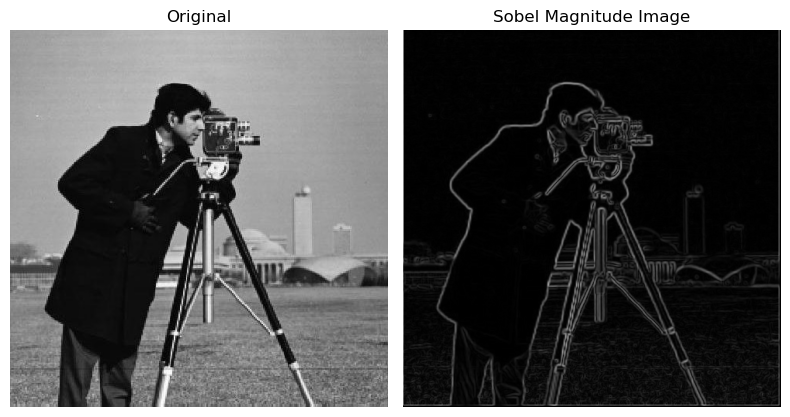

In [5]:
img = read_BGR_image_and_return_RGB_image('./Images/cameraman.jpeg')

cameraman = read_BGR_image_and_return_RGB_image('./Images/cameraman.jpeg')
cameraman_gaussian = cv2.GaussianBlur(cameraman , (3,3) , 1)
cameraman_gaussian_sobelx = applyDerivativeFunctionToImageAndReturnNewImage(cameraman_gaussian , "sobelx")
cameraman_gaussian_sobely = applyDerivativeFunctionToImageAndReturnNewImage(cameraman_gaussian , "sobely")

#-----------------------------------

cameraman_combined_sobelx_and_sobely = np.zeros((cameraman_gaussian_sobelx.shape[0], cameraman_gaussian_sobelx.shape[1]))
for i in range(cameraman_gaussian_sobelx.shape[0]):
    for j in range(cameraman_gaussian_sobelx.shape[1]):
        cameraman_combined_sobelx_and_sobely[i, j] = math.sqrt((cameraman_gaussian_sobelx[i, j] ** 2) + (cameraman_gaussian_sobely[i, j] ** 2))



fig , arr = plt.subplots(1,2, figsize=(8,5))
arr[0].imshow(img , cmap = "gray")
arr[0].set_title("Original")
arr[0].axis("off")
arr[1].imshow(cameraman_combined_sobelx_and_sobely , cmap = "gray")
arr[1].set_title("Sobel Magnitude Image")
arr[1].axis("off")

plt.tight_layout()
plt.show()

# Task 1 - B

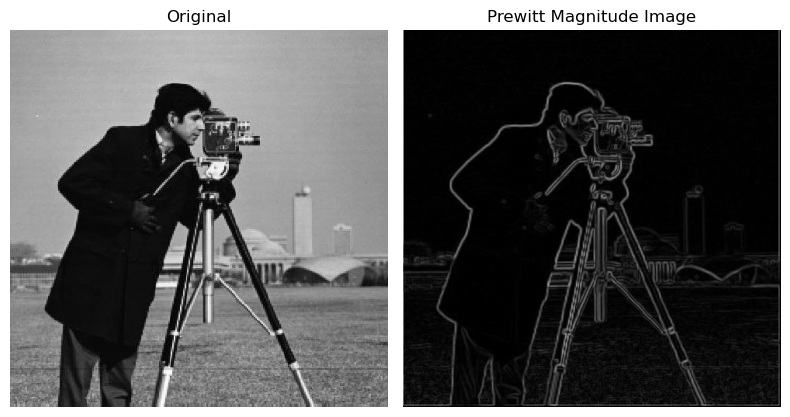

In [7]:
cameraman = read_BGR_image_and_return_RGB_image('./Images/cameraman.jpeg')
cameraman_gaussian = cv2.GaussianBlur(cameraman , (3,3) , 1)
cameraman_gaussian_prewittx = applyDerivativeFunctionToImageAndReturnNewImage(cameraman_gaussian , "prewittx")
cameraman_gaussian_prewitty = applyDerivativeFunctionToImageAndReturnNewImage(cameraman_gaussian , "prewitty")

#-----------------------------------
cameraman_combined_prewittx_and_prewitty = np.zeros((cameraman_gaussian_prewittx.shape[0], cameraman_gaussian_prewittx.shape[1]))
for i in range(cameraman_gaussian_prewittx.shape[0]):
    for j in range(cameraman_gaussian_prewittx.shape[1]):
        cameraman_combined_prewittx_and_prewitty[i, j] = math.sqrt((cameraman_gaussian_prewittx[i, j] ** 2) + (cameraman_gaussian_prewitty[i, j] ** 2))



fig , arr = plt.subplots(1,2, figsize=(8, 5))
arr[0].imshow(img , cmap = "gray")
arr[0].set_title("Original")
arr[0].axis("off")
arr[1].imshow(cameraman_combined_prewittx_and_prewitty , cmap = "gray")
arr[1].set_title("Prewitt Magnitude Image")
arr[1].axis("off")

plt.tight_layout()
plt.show()

# Task 1 - C

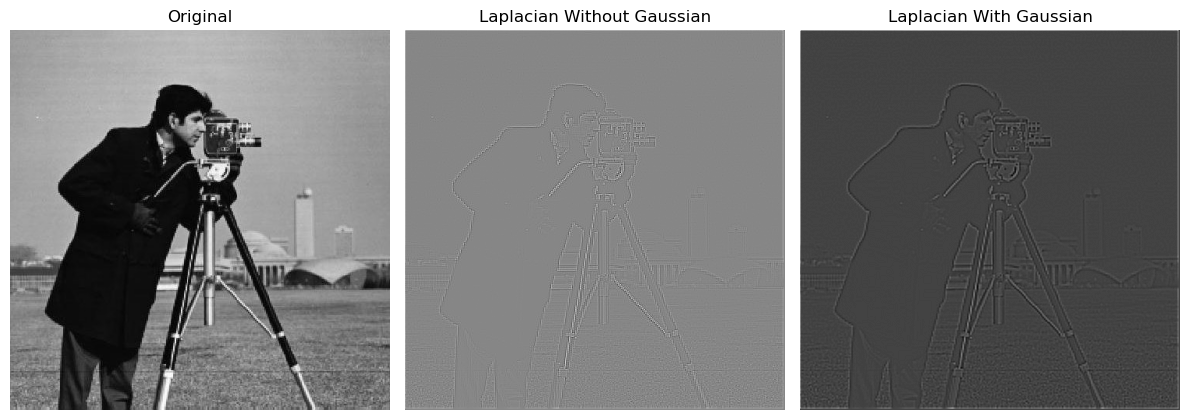

In [9]:
l1 = applyDerivativeFunctionToImageAndReturnNewImage(img , "laplacian")
l2 = applyDerivativeFunctionToImageAndReturnNewImage(cv2.GaussianBlur(img , (3,3) , 1) , "laplacian")

fig , arr = plt.subplots(1,3, figsize=(12, 7))
arr[0].imshow(img , cmap = "gray")
arr[0].set_title("Original")
arr[0].axis("off")
arr[1].imshow(l1 , cmap = "gray")
arr[1].set_title("Laplacian Without Gaussian")
arr[1].axis("off")
arr[2].imshow(l2 , cmap = "gray")
arr[2].set_title("Laplacian With Gaussian")
arr[2].axis("off")

plt.tight_layout()
plt.show()

# Task 1 - D

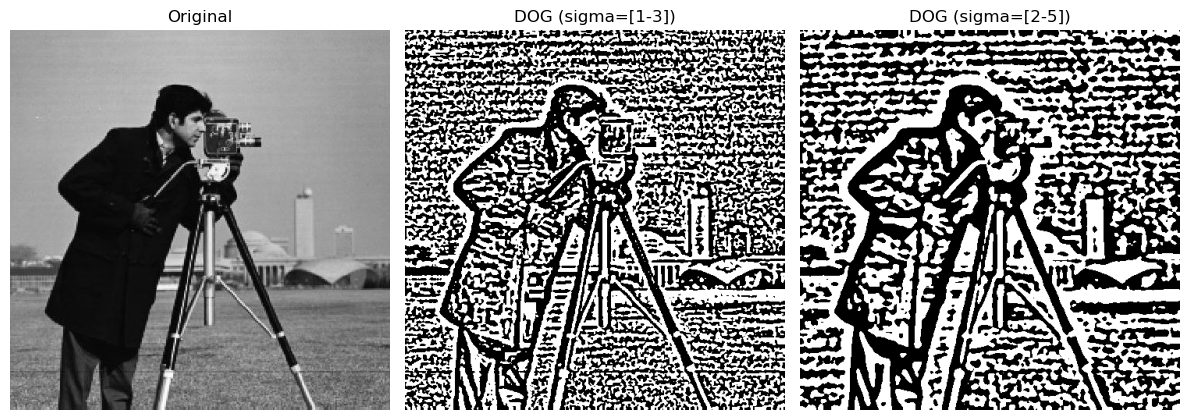

In [11]:
dog1 = differenceOfGaussian(img , 1, 3)
dog2 = differenceOfGaussian(img , 2, 5)

fig , arr = plt.subplots(1,3, figsize=(12, 7))
arr[0].imshow(img , cmap = "gray")
arr[0].set_title("Original")
arr[0].axis("off")
arr[1].imshow(dog1 , cmap = "gray")
arr[1].set_title("DOG (sigma=[1-3])")
arr[1].axis("off")
arr[2].imshow(dog2 , cmap = "gray")
arr[2].set_title("DOG (sigma=[2-5])")
arr[2].axis("off")

plt.tight_layout()
plt.show()

# Task 2

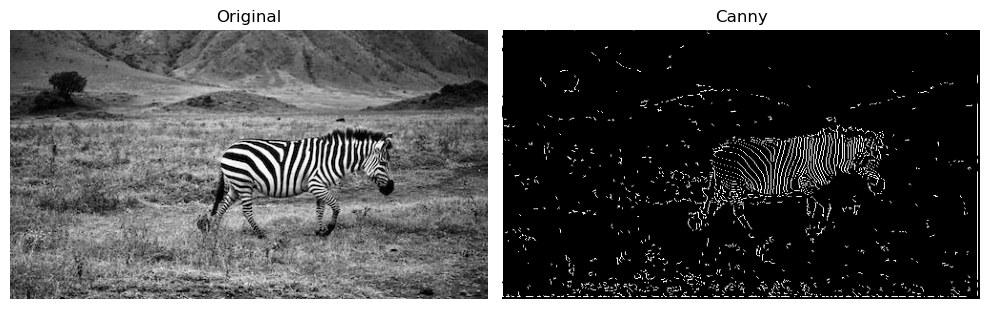

In [13]:
zebraImg = read_BGR_image_and_return_RGB_image('./Images/zebra.jpeg')
zebraCanny = three_d_image_canny_edge_detection('./Images/zebra.jpeg', 3, 1, 200 , 100)

fig , arr = plt.subplots(1,2, figsize = (10,8))
arr[0].imshow(zebraImg , cmap="gray")
arr[0].set_title("Original")
arr[0].axis("off")
arr[1].imshow(zebraCanny , cmap="gray")
arr[1].set_title("Canny")
arr[1].axis("off")

plt.tight_layout()
plt.show()

# Task 3

In [15]:
img = read_BGR_image_and_return_RGB_image('./Images/lines.jpg')# = three_d_image_canny_edge_detection('./Images/lines.jpg', 3, 1, 200 , 100)
edges = cv2.Canny(img , 100 , 200)

In [16]:
def findLineQuadrant (slope , y_intercept):
    if slope*0 + y_intercept > 0 and (0 - y_intercept)/slope > 0:
        return 1
    elif slope*0 + y_intercept > 0 and (0 - y_intercept)/slope < 0:
        return 2
    elif slope*0 + y_intercept < 0 and (0 - y_intercept)/slope < 0:
        return 3
    else:
        return 4

In [17]:
maxRho = math.ceil(math.sqrt((edges.shape[0] ** 2) + (edges.shape[1] ** 2)))
maxTheta = 360
accumulatorArray = np.zeros((maxRho , maxTheta))

for row in range(edges.shape[0]):
    for col in range(edges.shape[1]):
        if edges[row][col] != 255:
            continue
        x_distFromY = col
        y_distFromX = edges.shape[0] - row
        if x_distFromY == 0 and y_distFromX == 0:
            continue
        for thetaForSlopeInDegrees in range(1, 180):
            if thetaForSlopeInDegrees == 90:
                continue
            thetaForSlopeInRadians = math.radians(thetaForSlopeInDegrees)
            m_slope = math.tan(thetaForSlopeInRadians)
            c_y_intercept = y_distFromX - m_slope * x_distFromY

            rho = abs(c_y_intercept) / math.sqrt(1 + (m_slope ** 2))
            
            polarTheta = 0
            if findLineQuadrant(m_slope , c_y_intercept) == 1:
                polarTheta = thetaForSlopeInDegrees - 90
            elif findLineQuadrant(m_slope , c_y_intercept) == 2:
                polarTheta = thetaForSlopeInDegrees + 90
            elif findLineQuadrant(m_slope , c_y_intercept) == 3:
                polarTheta = thetaForSlopeInDegrees + 90
            else:
                polarTheta = thetaForSlopeInDegrees + 270

            rho = math.floor(rho)
            polarTheta = math.floor(polarTheta)
                
            accumulatorArray[rho][polarTheta] += 1

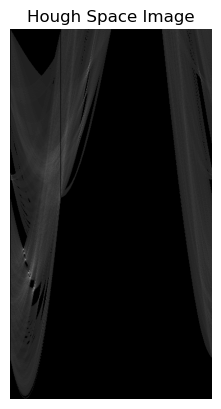

In [18]:
houghSpaceImage = np.zeros((accumulatorArray.shape[0], accumulatorArray.shape[1]))

for i in range(accumulatorArray.shape[0]):
    for j in range(accumulatorArray.shape[1]):
        if accumulatorArray[i][j] > 0:
            houghSpaceImage[i][j] = accumulatorArray[i][j] + 40

plt.imshow(houghSpaceImage, cmap="gray")
plt.title("Hough Space Image")
plt.axis('off')
plt.show()

In [19]:
maxArr = []
for i in range(accumulatorArray.shape[0]):
    for j in range(accumulatorArray.shape[1]):
        maxArr.append(accumulatorArray[i][j])

maxArr.sort(reverse=True)

rho_theta_list = []

for i in range(accumulatorArray.shape[0]):
    for j in range(accumulatorArray.shape[1]):
        if accumulatorArray[i][j] in maxArr[0:15]:
            rho_theta_list.append([i , j , accumulatorArray[i][j]])


In [20]:
print("\nTop 10 Rho-Theta values and Equations of the detected lines in (y = m * x + c) format\n")

lines = []

for i in sorted(rho_theta_list, key=lambda x: x[2], reverse=True):
    m_slopeOfPerpendicular = math.tan(math.radians(i[1]))
    # m_slopeOfLine = -1 * m_slopeOfPerpendicular
    m_slopeOfLine = -1 / m_slopeOfPerpendicular
    y_line = i[0] * math.sin(math.radians(i[1]))
    x_line = i[0] * math.cos(math.radians(i[1]))
    c_line = y_line - m_slopeOfLine * x_line
    lines.append(tuple([m_slopeOfLine, c_line]))

    print(f'rho = {i[0]}\ttheta = {i[1]}\tvotes in accumulator array = {i[2]}\tEquation: y = {m_slopeOfLine:.2f} * x + {c_line:.2f}')


print()


Top 10 Rho-Theta values and Equations of the detected lines in (y = m * x + c) format

rho = 444	theta = 35	votes in accumulator array = 290.0	Equation: y = -1.43 * x + 774.09
rho = 435	theta = 33	votes in accumulator array = 243.0	Equation: y = -1.54 * x + 798.69
rho = 462	theta = 42	votes in accumulator array = 202.0	Equation: y = -1.11 * x + 690.45
rho = 461	theta = 42	votes in accumulator array = 189.0	Equation: y = -1.11 * x + 688.95
rho = 400	theta = 25	votes in accumulator array = 183.0	Equation: y = -2.14 * x + 946.48
rho = 412	theta = 27	votes in accumulator array = 176.0	Equation: y = -1.96 * x + 907.51
rho = 464	theta = 41	votes in accumulator array = 165.0	Equation: y = -1.15 * x + 707.25
rho = 64	theta = 141	votes in accumulator array = 163.0	Equation: y = 1.23 * x + 101.70
rho = 463	theta = 43	votes in accumulator array = 162.0	Equation: y = -1.07 * x + 678.89
rho = 66	theta = 140	votes in accumulator array = 154.0	Equation: y = 1.19 * x + 102.68
rho = 434	theta = 33	vot

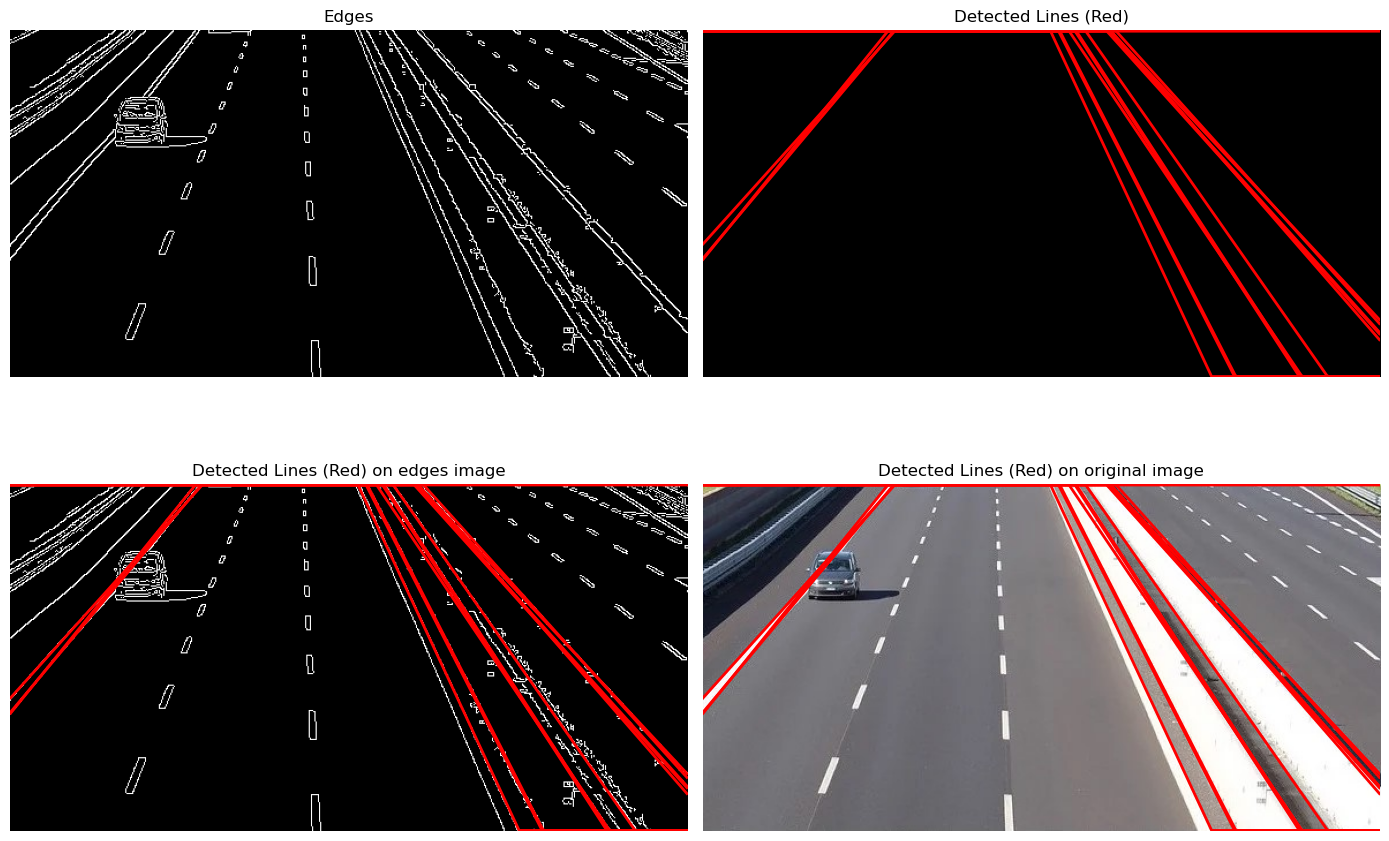

In [21]:
fig, ((ax2, ax4), (ax3, ax1)) = plt.subplots(2, 2, figsize=(14, 10))

z = np.zeros(img.shape)

ax4.imshow(z, cmap='gray')
ax4.set_title("Detected Lines (Red)")
ax4.axis("off")

ax1.imshow(img, cmap='gray')
ax1.set_title("Detected Lines (Red) on original image")
ax1.axis("off")

ax3.imshow(edges, cmap='gray')
ax3.set_title("Detected Lines (Red) on edges image")
ax3.axis("off")


for slope, intercept in lines:
    x_values = np.linspace(0, edges.shape[1] - 1, 400)
    y_values = slope * x_values + intercept 

    y_values = np.clip(y_values, 0, edges.shape[0] - 1)

    y_values = edges.shape[0] - 1 - y_values

    ax1.plot(x_values, y_values, label=f'y = {slope}x + {intercept}', color='red', lw=2)  
    ax3.plot(x_values, y_values, label=f'y = {slope}x + {intercept}', color='red', lw=2)  
    ax4.plot(x_values, y_values, label=f'y = {slope}x + {intercept}', color='red', lw=2)  
    
ax2.imshow(edges, cmap="gray")
ax2.set_title("Edges")
ax2.axis("off")

plt.tight_layout()
plt.show()


# Task 4

In [23]:
edges = cv2.Canny(cv2.GaussianBlur(read_BGR_image_and_return_RGB_image('./Images/coins.jpeg') , (5,5), 2), 100, 200)

In [24]:
edges = edges[10:205, 10:204]

In [25]:
def calculate_b ( a , x , y , r ):

    if r**2 - (x-a)**2 < 0:
        return -1

    return [round(y - math.sqrt(r**2 -(x-a)**2)) , round(y + math.sqrt(r**2 -(x-a)**2))]

In [26]:
accumulatorArrayRadius = 0

if edges.shape[0] > edges.shape[1]:
    accumulatorArrayRadius = math.ceil(edges.shape[1] / 2)
else:
    accumulatorArrayRadius = math.ceil(edges.shape[0] / 2)
    
accumulatorArray = np.zeros((edges.shape[0] , edges.shape[1] , accumulatorArrayRadius))

In [27]:
for row in range(edges.shape[0]):
    for col in range(edges.shape[1]):
        if edges[row][col] == 255:
            for radius in range(1, accumulatorArray.shape[2]):
                for a in range(edges.shape[1]):
                    b = calculate_b(a , col , row , radius)
                    # numberOfOperations += 1
                    if b == -1:
                        continue
                    elif (b[0] not in range(accumulatorArray.shape[0]) and b[1] in range(accumulatorArray.shape[0])):
                        accumulatorArray[b[1]][a][radius] += 1
                    elif (b[0] in range(accumulatorArray.shape[0]) and b[1] not in range(accumulatorArray.shape[0])):
                        accumulatorArray[b[0]][a][radius] += 1
                    else:
                        accumulatorArray[b[0]][a][radius] += 1
                        accumulatorArray[b[1]][a][radius] += 1

In [28]:
import numpy as np

def top_n_elements(arr, n):
    
    flat_arr = arr.flatten()

    sorted_indices = np.argsort(flat_arr)

    top_n_indices = sorted_indices[-n:]

    top_n_3d_indices = np.unravel_index(top_n_indices, arr.shape)

    top_n_values = flat_arr[top_n_indices]

    result = []
    for i in range(n):
        value = top_n_values[i]
        dim1 = top_n_3d_indices[0][i]
        dim2 = top_n_3d_indices[1][i]
        dim3 = top_n_3d_indices[2][i]
        result.append([value, dim1, dim2, dim3])

    return result


In [29]:
circles_data = top_n_elements(accumulatorArray, 7)

In [30]:
circles_data.reverse()

In [31]:
for i in circles_data:
    print(f'Circle Center(a,b) = ({i[1]},{i[2]}) \tRadius = {i[3]}\tVotes = {i[0]}')

Circle Center(a,b) = (71,46) 	Radius = 23	Votes = 85.0
Circle Center(a,b) = (118,160) 	Radius = 19	Votes = 63.0
Circle Center(a,b) = (134,66) 	Radius = 22	Votes = 59.0
Circle Center(a,b) = (160,122) 	Radius = 19	Votes = 53.0
Circle Center(a,b) = (24,100) 	Radius = 17	Votes = 53.0
Circle Center(a,b) = (91,109) 	Radius = 16	Votes = 52.0
Circle Center(a,b) = (59,160) 	Radius = 22	Votes = 52.0


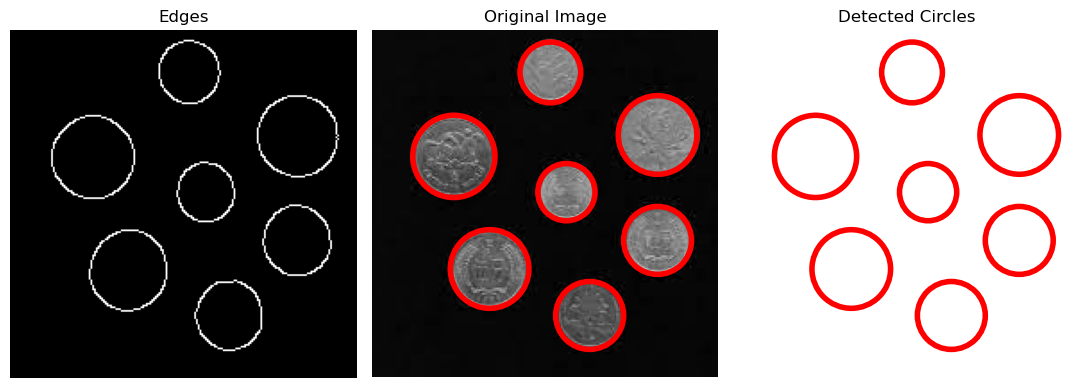

In [32]:
x = read_BGR_image_and_return_RGB_image('./Images/coins.jpeg')
x = x[10:205, 10:204]

import matplotlib.patches as patches


fig, (ax2, ax1, ax3) = plt.subplots(1,3 , figsize = (11,4))

for data in circles_data:
    value, a, b, radius = data
    circle = patches.Circle((b, a), radius, edgecolor='red', facecolor='none', lw=4)
    ax1.add_patch(circle)



ax1.set_xlim(0, 194) 
ax1.set_ylim(195, 0)
ax1.set_aspect('equal')


for data in circles_data:
    value, a, b, radius = data
    circle = patches.Circle((b, a), radius, edgecolor='red', facecolor='none', lw=4)
    ax3.add_patch(circle)

ax3.set_xlim(0, 194) 
ax3.set_ylim(195, 0)
ax3.set_aspect('equal')
ax3.set_title("Detected Circles")
ax3.axis('off')


ax2.imshow(edges, cmap="gray")
ax2.set_title("Edges")
ax2.axis("off")

ax1.imshow(x, cmap="gray")
ax1.set_title("Original Image")
ax1.axis("off")


plt.tight_layout()
plt.show()